In [110]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


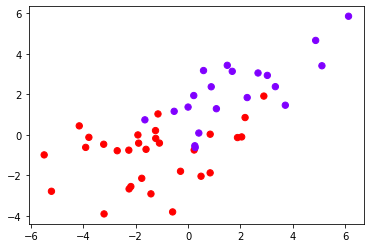

In [111]:
#Srednie dla klas 
m1 = np.array([-1,-1])
m2 = np.array([2,2])
#Liczności dla klas
n1 = 30
n2 = 20 
#Macierz kowariancji 
S1 = np.array([[4,2],[2,4]])
S2 = np.array([[4,2],[2,2]])


r1 = np.random.multivariate_normal(m1,S1,n1)
y1 = np.zeros(n1)

r2 = np.random.multivariate_normal(m2,S2,n2)
y2 = np.ones(n2)

r12 = np.concatenate((r1,r2))
y = np.hstack((y1, y2))  

plt.scatter(r12[:,0],r12[:,1], c=y, s=40, cmap="rainbow_r");

In [112]:
#Trenuje klasyfikator na calym zbiorze, gdzie PU = PT 

k_range = range(1,22)
scores = {} 
scores_list = []
TN_list = []
TP_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(r12,y)
    y_pred=knn.predict(r12)
    scores[k]=metrics.accuracy_score(y,y_pred)
    scores_list.append(metrics.accuracy_score(y,y_pred))
    TP_list.append(confusion_matrix(y,y_pred)[0,0])
    TN_list.append(confusion_matrix(y,y_pred)[1,1]) 

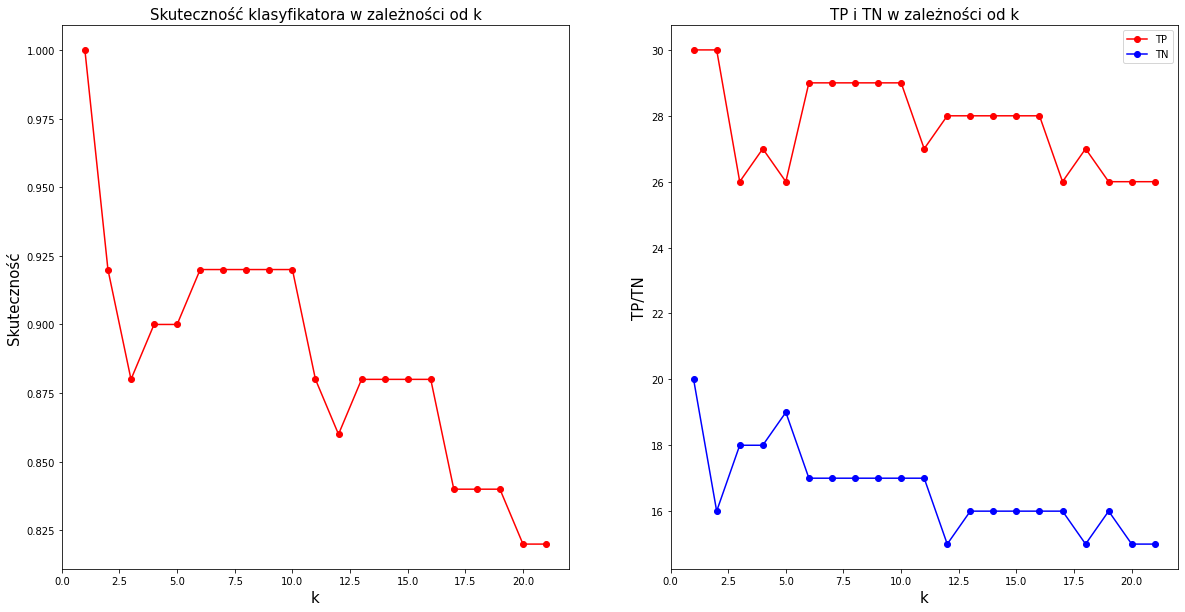

In [113]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(k_range,scores_list,linestyle='-',color = "red",
         marker = 'o',markerfacecolor='red',label = "Skuteczność",)
ax1.set_title('Skuteczność klasyfikatora w zależności od k', fontsize = 15)
ax1.set_xlabel('k', fontsize = 15)
ax1.set_ylabel('Skuteczność', fontsize = 15)

ax2.plot(k_range,TP_list,linestyle='-',color = "red",
         marker = 'o',markerfacecolor='red',label = "TP",)
ax2.plot(k_range,TN_list,linestyle='-',color = "blue",
         marker = 'o',markerfacecolor='blue',label = "TN")
ax2.set_title('TP i TN w zależności od k', fontsize = 15)
ax2.set_xlabel('k', fontsize = 15)
ax2.set_ylabel('TP/TN', fontsize = 15)
ax2.legend()
plt.show()




Skuteczność klasyfikatora jest największa dla k = 1 (bo klasa określana tylko na podstawie jednego najbliższego sąsiada). Im większe k, tym skuteczność zaczyna meleć i dla wprowadzonych danych zaczyna skokowo maleć. 
Wartość TP w funkcji k jest funkcją pokazującą ile elementów z klasy 0 zaklasyfikowano jako klase 0. Liczność tej klasy to 30, stąd wartość maksymalna dla k=1. 
Wartość TN w funkcji k jest funkcją pokazującą ile elementów z klasy 1 zaklasyfikowano jako klase 1. Liczność tej klasy to 20, stąd wartość maksymalna dla k=1.  


In [121]:
#Losuje 10 punktów z klasy 0 oraz 5 punktów z klasy 1 

X_test = np.r_[np.random.multivariate_normal(m1,S1,10), np.random.multivariate_normal(m2,S2,5)]

y_test = np.hstack((np.zeros(10),np.ones(5)))

In [122]:
k_range = range(1,22)
scores = {} 
scores_list = []
TN_list = []
TP_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(r12,y)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    TP_list.append(confusion_matrix(y_test,y_pred)[0,0])
    TN_list.append(confusion_matrix(y_test,y_pred)[1,1]) 

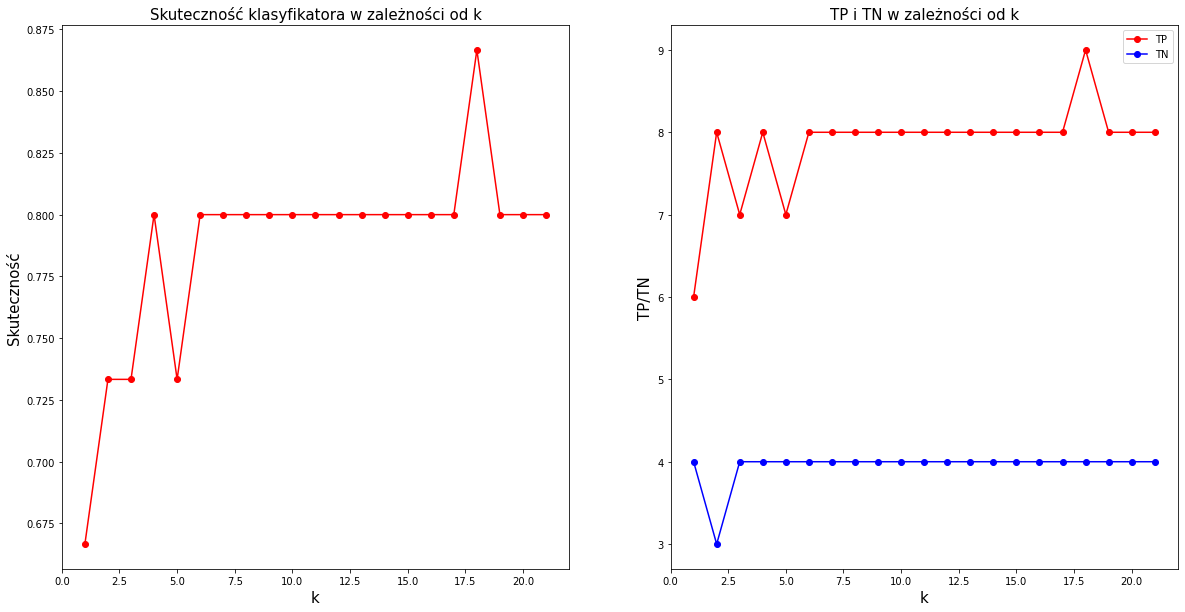

In [123]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(k_range,scores_list,linestyle='-',color = "red",
         marker = 'o',markerfacecolor='red',label = "Skuteczność",)
ax1.set_title('Skuteczność klasyfikatora w zależności od k', fontsize = 15)
ax1.set_xlabel('k', fontsize = 15)
ax1.set_ylabel('Skuteczność', fontsize = 15)

ax2.plot(k_range,TP_list,linestyle='-',color = "red",
         marker = 'o',markerfacecolor='red',label = "TP",)
ax2.plot(k_range,TN_list,linestyle='-',color = "blue",
         marker = 'o',markerfacecolor='blue',label = "TN")
ax2.set_title('TP i TN w zależności od k', fontsize = 15)
ax2.set_xlabel('k', fontsize = 15)
ax2.set_ylabel('TP/TN', fontsize = 15)
ax2.legend()
plt.show()

Skuteczność klasyfikatora wzrasta wraz z wartością k. Ponieważ bierzemy tylko część punktów z całego zbioru, zatem dostarczając informacji odnośnie otoczenia spodziewamy się lepszej skuteczności. TP i TN definiujemy tak jak dla poprzedniego wykresu. Dla wygenerowanych wartosci widzimy, że wartość TP stabilizuje się dla 8 zaś wartość TN dla 4, biorąc pod uwagę wartości maksymalne które mogłyby zostać uzyskane (10 oraz 5) można wnioskować że są takie punkty, których klasyfikacja jest niemożliwa/utrudniona. 